In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing required libraries:

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

# Importing and Exploring the Data:

In [24]:
raw_data = pd.read_csv('/content/drive/MyDrive/Machine Learning : Prediction of the Big Five Personality Traits/Big5Personality.csv', sep='\t')
data = raw_data.copy()

data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,...,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,...,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,...,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,...,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,...,17,2,KE,1.0,38.0


In [25]:
print('Number of participants: ', len(data))

Number of participants:  1015341


In [26]:
print(data.columns.tolist())

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'count

**Since we will not be analysing the duration participants took to answer each question, we will drop those columns along with the other statistics regarding the test.**

In [27]:
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

In [28]:
#Our cleaned dataset will have the answer to the 50 questions in our dataset and the country they belong to.
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,KE


In [29]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


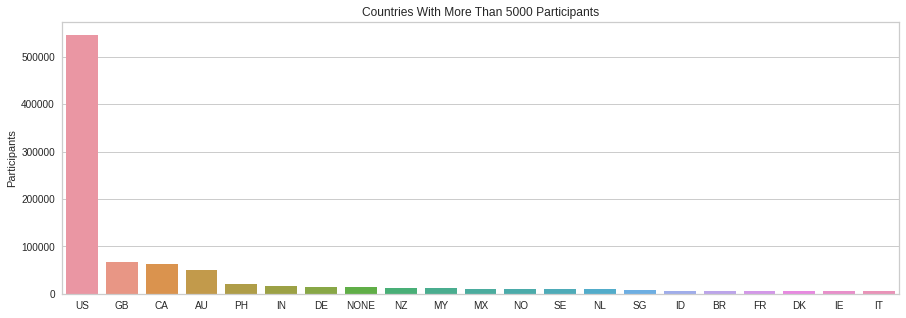

In [30]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [31]:
# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [32]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [33]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.7)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


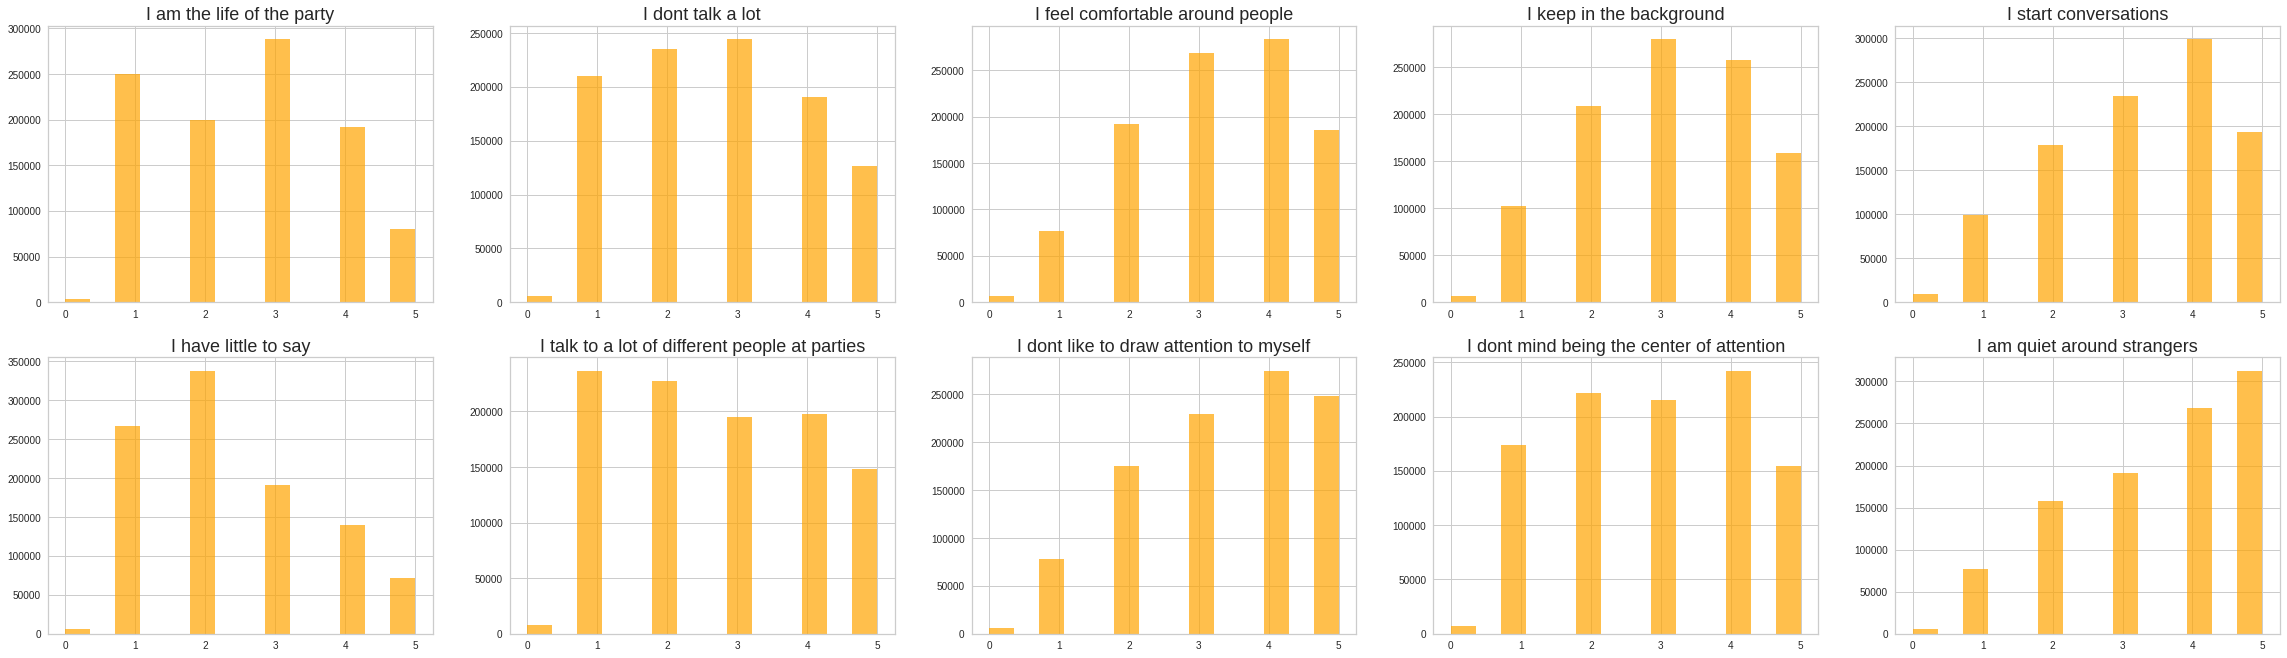

In [34]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


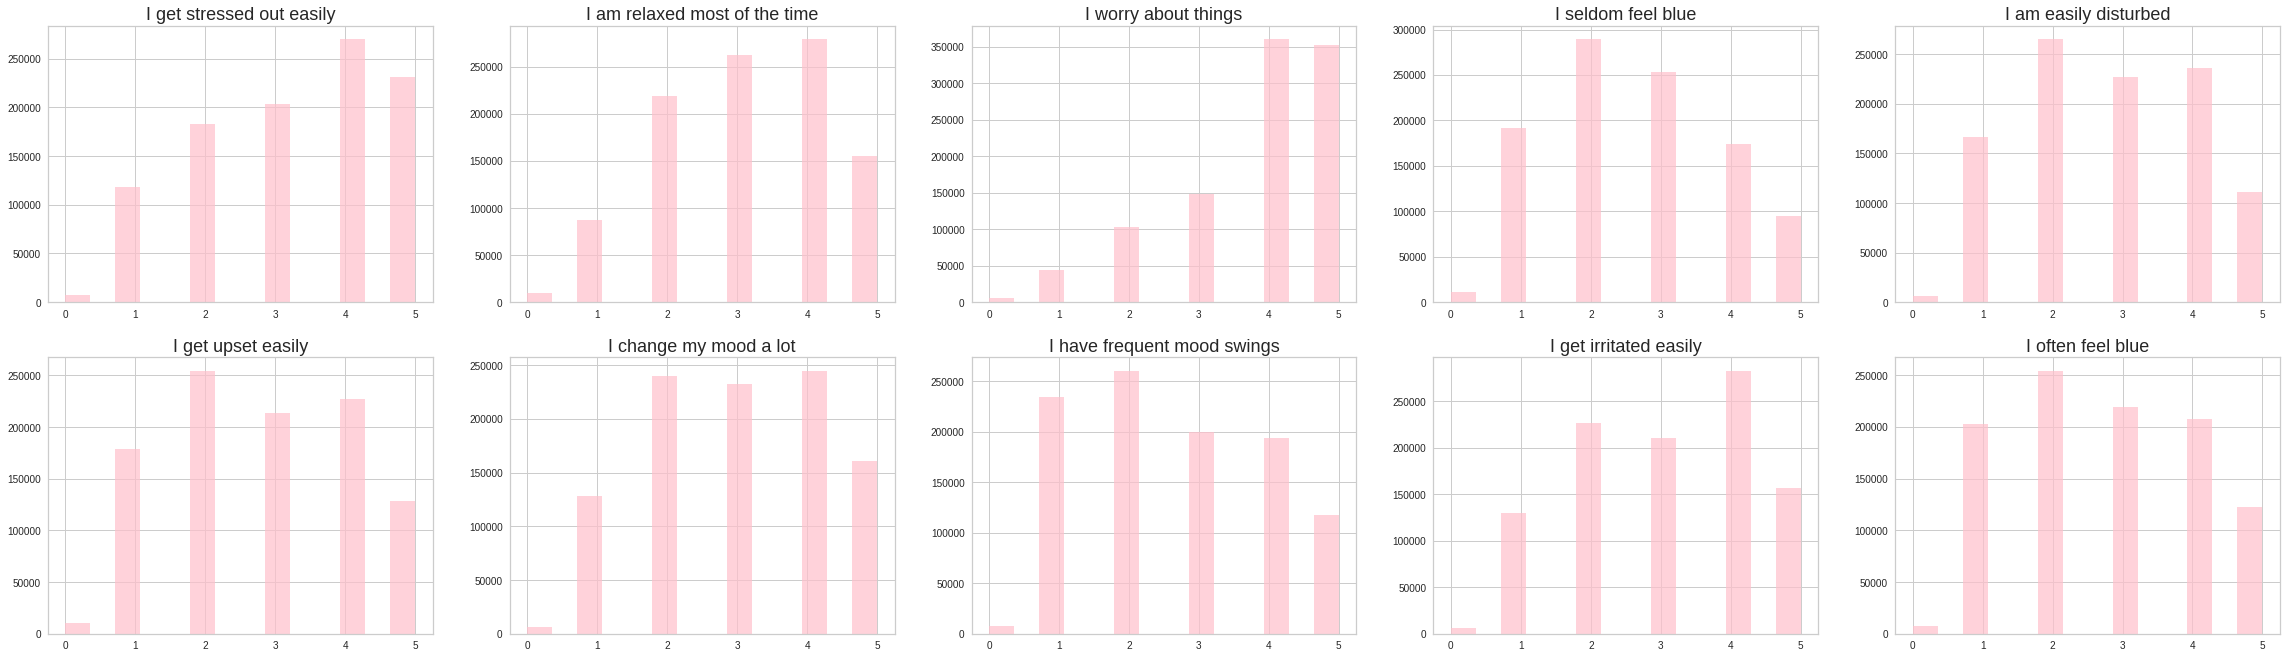

In [35]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


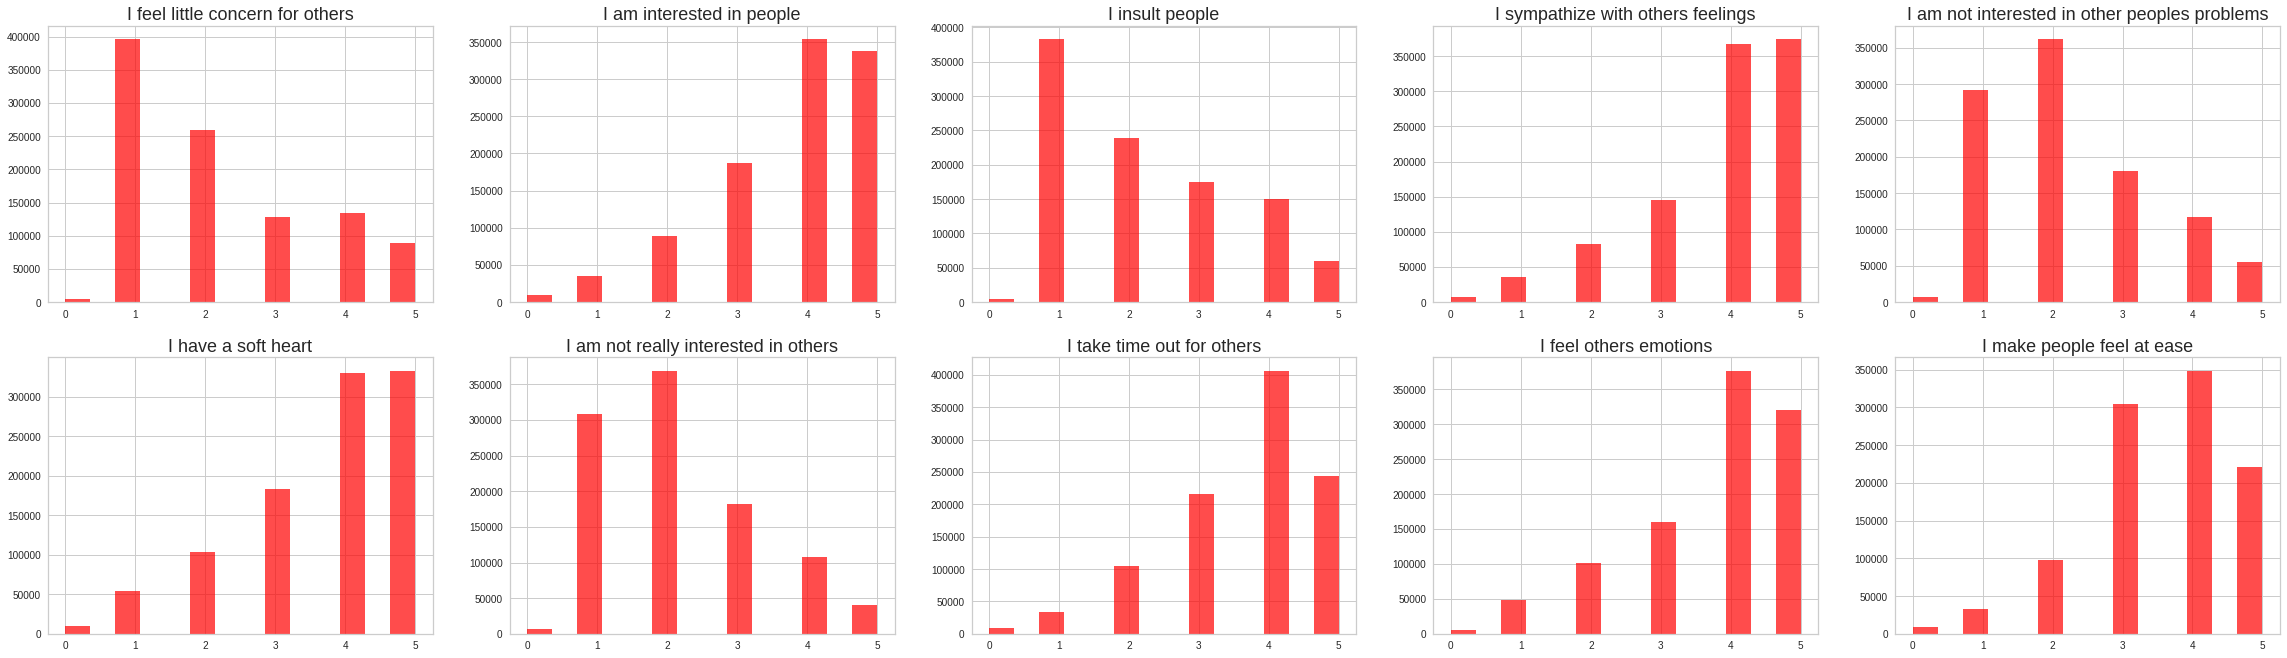

In [36]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


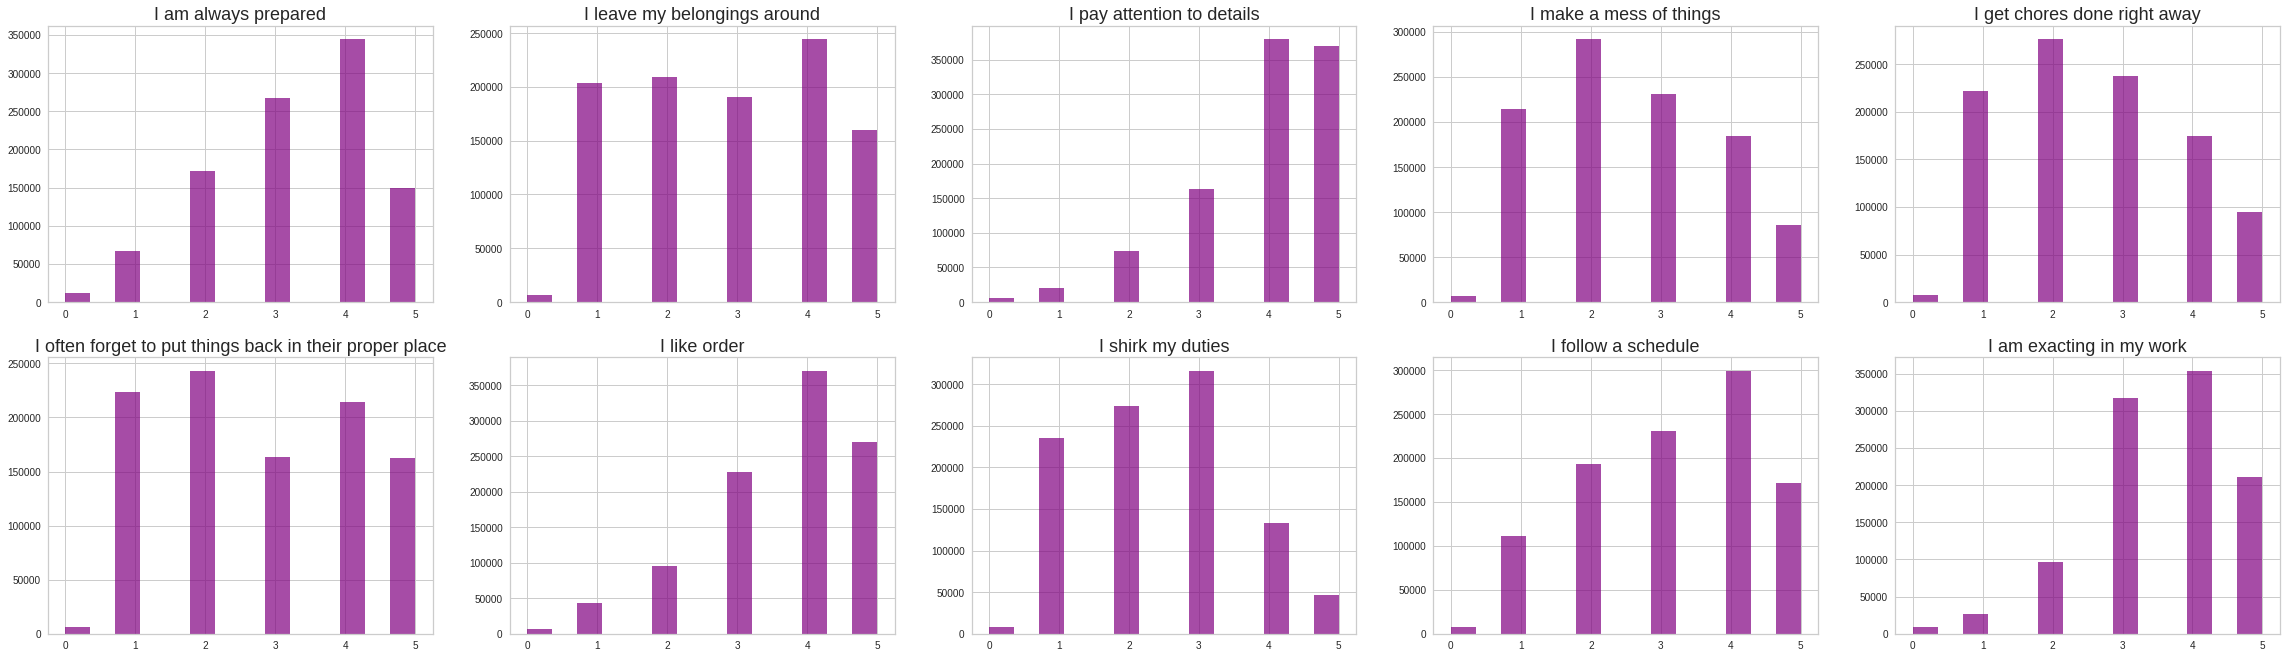

In [37]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


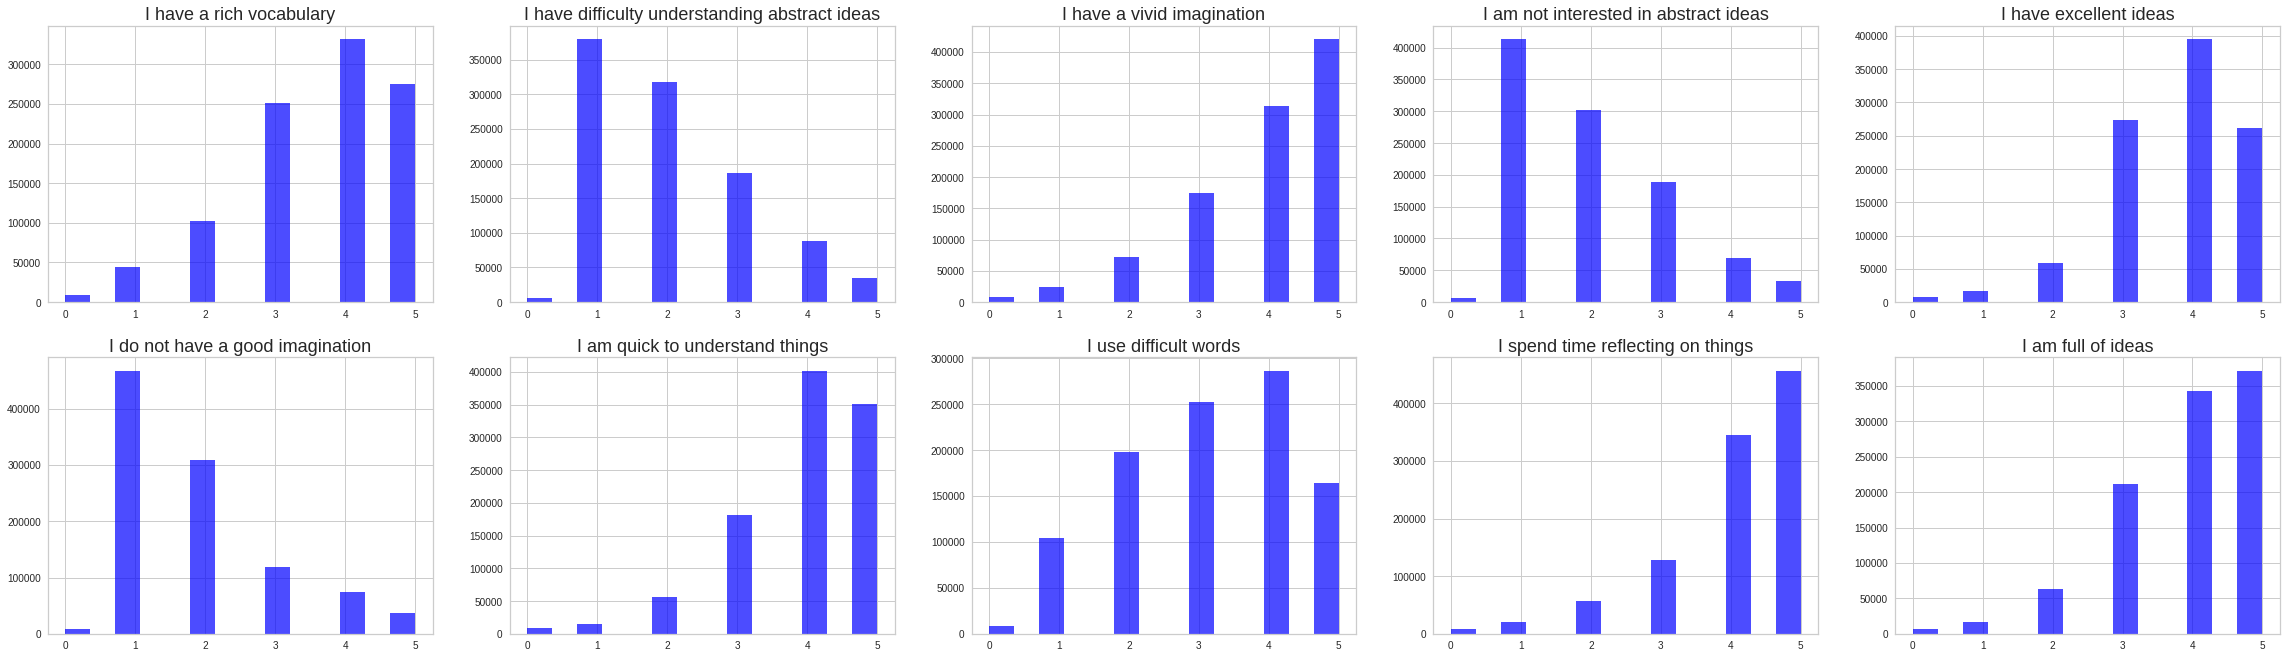

In [38]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

# Clustering:

In [39]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

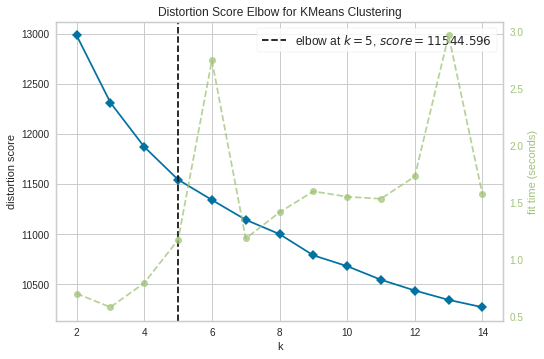

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As we can observe, at value of k being 5, the fitting time of model appears to drop drastically and we observe the distortion score of 11544.546. Taking into account the large number of data points and our computational capacity, we can finalize the number of clusters as 5 and move forward with fitting the Kmeans model to the data.

In [41]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.8,0.2,1.0,0.4,1.0,...,0.2,1.0,0.6,0.8,1.0
1,0.6,1.0,0.6,0.8,0.6,...,0.2,0.8,0.4,1.0,0.6
2,0.4,0.6,0.8,0.8,0.6,...,0.4,1.0,0.6,0.8,0.8
3,0.4,0.4,0.4,0.6,0.8,...,0.2,0.8,0.8,0.6,0.6
4,0.6,0.6,0.6,0.6,1.0,...,0.2,1.0,0.6,1.0,1.0


In [42]:
# I use the unscaled data but without the country column
df_model = df.copy()

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [43]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,2
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,4
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,4
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,0
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,2


In [44]:
print(f'Silhouette Score(n=5): {silhouette_score(df_model[:100000], predictions[:100000])}')

Silhouette Score(n=5): 0.16989888844086912


In [45]:
df_model.Clusters.value_counts()

1    226391
4    212134
2    210908
3    198674
0    165374
Name: Clusters, dtype: int64

# Factor Analysis:

In [46]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.437110,0.658434,0.559350,0.681529,0.517107,0.553193,0.423456,0.706161,0.528840,0.758126,0.467873,0.725029,0.597845,0.584883,0.463814,0.401462,0.458875,0.382943,0.514417,0.447658,0.603770,0.587206,0.512812,0.556597,0.628582,0.531179,0.599105,0.571327,0.522117,0.596432,0.629516,0.565320,0.733958,0.480724,0.474656,0.547266,0.676159,0.501685,0.554968,0.668273,0.706759,0.395559,0.722644,0.411690,0.724345,0.408611,0.777104,0.621245,0.739826,0.733113
1,0.691624,0.381750,0.760039,0.499420,0.809372,0.365489,0.732350,0.552245,0.754172,0.598261,0.759548,0.587419,0.846795,0.483813,0.655811,0.690630,0.759077,0.688597,0.729135,0.632099,0.432218,0.854769,0.531280,0.835943,0.400545,0.798597,0.371292,0.779181,0.825525,0.769301,0.590793,0.722028,0.767632,0.647076,0.446459,0.705290,0.690800,0.565526,0.588377,0.695444,0.747823,0.422981,0.849298,0.393175,0.791698,0.354195,0.792682,0.674956,0.837111,0.840502
2,0.691670,0.391666,0.866464,0.446503,0.850918,0.334975,0.774445,0.564604,0.745737,0.505950,0.464198,0.764410,0.631223,0.656842,0.422173,0.379257,0.420895,0.334331,0.422350,0.343483,0.378290,0.885829,0.364468,0.849915,0.371260,0.770025,0.317842,0.819760,0.820398,0.838781,0.744955,0.513138,0.839479,0.377468,0.629958,0.453244,0.775488,0.385713,0.718010,0.775746,0.776499,0.351086,0.815830,0.359258,0.831140,0.331217,0.862815,0.645990,0.819530,0.858279
3,0.363144,0.724094,0.446586,0.809855,0.457404,0.638098,0.349800,0.812156,0.437320,0.893979,0.849295,0.492484,0.900110,0.429396,0.711625,0.771751,0.798479,0.752707,0.801633,0.786672,0.501495,0.665935,0.523447,0.759374,0.518297,0.763263,0.549240,0.680469,0.727741,0.608507,0.558037,0.674886,0.760834,0.698671,0.415531,0.704215,0.709558,0.611654,0.552086,0.659884,0.700187,0.476569,0.812737,0.427583,0.686625,0.417626,0.735106,0.636245,0.854595,0.744781
4,0.423644,0.661469,0.615199,0.734162,0.589913,0.542302,0.439182,0.801042,0.463773,0.828463,0.707524,0.610916,0.834985,0.517765,0.568925,0.564873,0.580586,0.493331,0.601229,0.548272,0.377253,0.786304,0.340052,0.870552,0.397792,0.829770,0.404403,0.796010,0.835290,0.742718,0.766736,0.446424,0.859835,0.406456,0.647036,0.416351,0.833764,0.404647,0.766843,0.778414,0.715207,0.428420,0.780080,0.412747,0.745160,0.393359,0.801409,0.598104,0.854266,0.762977


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [47]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['Extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['Neurotic'] = df_model[est].sum(axis=1)/10
data_sums['Agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['Conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['Open'] = df_model[opn].sum(axis=1)/10
data_sums['Clusters'] = predictions
data_sums.groupby('Clusters').mean()

,Extroversion,Neurotic,Agreeable,Conscientious,Open
Clusters,,,,,
0,0.582331,0.504480,0.570913,0.583253,0.624090
1,0.614472,0.683292,0.659865,0.641942,0.670442
2,0.617293,0.483916,0.641657,0.621320,0.665164
3,0.593244,0.729415,0.629777,0.634536,0.649205
4,0.609915,0.602841,0.638014,0.632651,0.649173


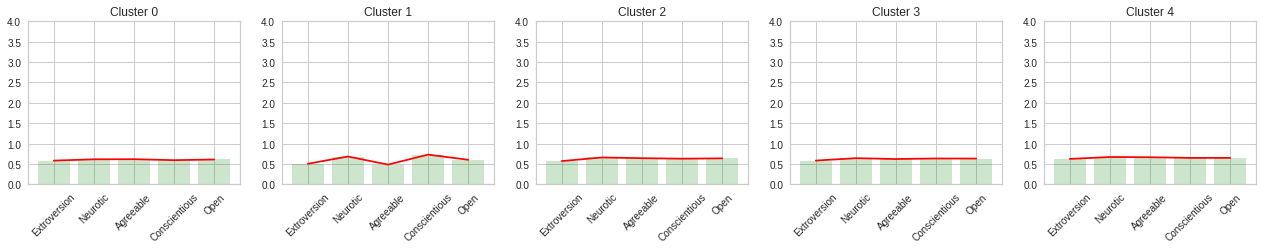

In [48]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('Clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

## Visualizing the Clusters:

In [49]:
# In order to visualize in 2D graph I will use PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,0.291455,-0.991668,2
1,-2.031371,-0.212182,4
2,-1.939360,-0.332524,4
3,2.044440,0.445558,0
4,-0.000475,-1.046673,2


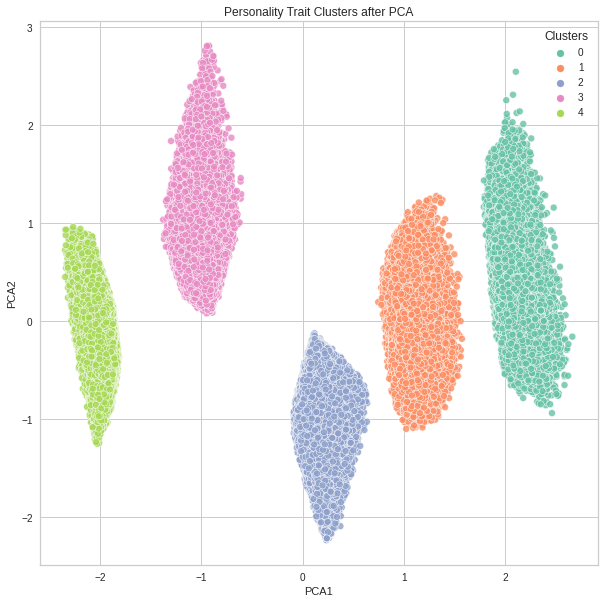

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Trait Clusters after PCA');

# Difficulties Faced:

In [51]:
# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)[:100000]

# I define 5 clusters and fit my model
db = DBSCAN(eps = 0.071117656123405, min_samples = 50)
db.fit(df_model)

print(db.labels_[:10])

print(f'Clusters: {set(db.labels_)}')

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Clusters: {0, 1, 2, -1}


In [52]:
unique, counts = np.unique(db.labels_, return_counts = True)
dict(zip(unique, counts))

{-1: 99667, 0: 211, 1: 62, 2: 60}

In [53]:
# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)[:100000]

# I define 5 clusters and fit my model
op = OPTICS(max_eps = 0.071117656123405, min_samples = 5)
op.fit(df_model)

print(op.labels_[:10])

print(f'Clusters: {set(op.labels_)}')

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Clusters: {0, 1, 2, 3, 4, 5, 6, -1}


In [54]:
unique, counts = np.unique(op.labels_, return_counts = True)
dict(zip(unique, counts))

{-1: 99615, 0: 211, 1: 62, 2: 60, 3: 8, 4: 7, 5: 5, 6: 32}

# Predictions:

Since the other two models weren’t fitted well, we have used the Kmeans model for getting the predictions. I have answered the questions myself in an excel sheet and got the predictions for the traits I possess.

We can interpret the results as the intensity of a particular trait on a scale of  0 to 5. The higher the scale, higher the intensity of the trait. For example, if an individual has a high score in the Extraversion trait, he is more likely to be an extrovert than an introvert.


In [55]:
my_data = pd.read_csv('/content/mydata.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [56]:
my_personality = k_fit.predict(my_data)
print('My Personality Traits: ', my_personality)

My Personality Traits:  [4]


In [57]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['Extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['Neurotic'] = my_data[est].sum(axis=1)/10
my_sums['Agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['Conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['Open'] = my_data[opn].sum(axis=1)/10
my_sums['Cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,Extroversion,Neurotic,Agreeable,Conscientious,Open,Cluster
0,3.2,2.4,3.4,3.3,3.4,4


## Model Deploment using streamlit:

In [58]:
import pickle

In [59]:
pickle.dump(k_fit, open('pers_model_km.pkl', 'wb'))

In [60]:
pickled_model = pickle.load(open('pers_model_km.pkl', 'rb'))

# Conclusion:

In this study, we were able to perform cluster analysis on a huge data set using the Kmeans clustering algorithm. We got the optimal silhouette score of 0.0711 on this model. We performed Factor analysis for constructing validation for the Big Five Personality Trait model and then predict the scores for each trait for any individual.

Further improvements are required in this study with better resources and better understanding of the underlying mathematics of each model.
